# QUANTIC MACHINE LEARNING

#### IMPORTS

In [1]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import iris
from qiskit_machine_learning.circuit.library import RawFeatureVector
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#### PARAMETERS

In [2]:
feature_dim = 4
training_size = 100
test_size = 49
seed = 1376
algorithm_globals.random_seed = seed

#### DATASET

In [3]:
training_features, training_labels, test_features, test_labels = iris(training_size=training_size, test_size=test_size, n=feature_dim)

In [4]:
print("x_train shape: {}.".format(training_features.shape))
print("y_train shape: {}.".format(training_labels.shape))
print("x_test shape: {}.".format(test_features.shape))
print("y_test shape: {}.".format(test_labels.shape))

x_train shape: (149, 4).
y_train shape: (149, 3).
x_test shape: (1, 4).
y_test shape: (1, 3).


INFO: Projection des données d'entrainements 2D sur la feature 0 et la feature 1


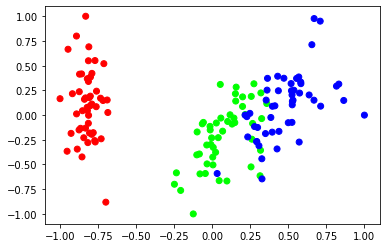

INFO: Projection des données d'entrainements 2D sur la feature 0 et la feature 2


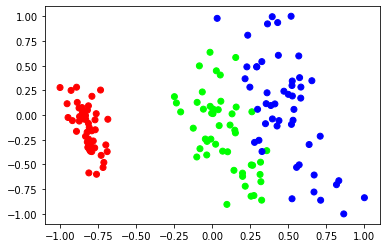

INFO: Projection des données d'entrainements 2D sur la feature 0 et la feature 3


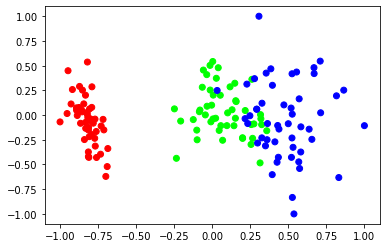

INFO: Projection des données d'entrainements 2D sur la feature 1 et la feature 2


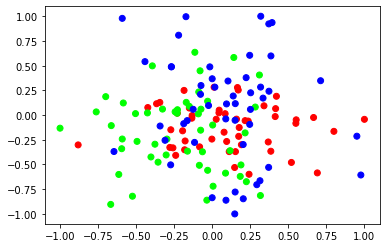

INFO: Projection des données d'entrainements 2D sur la feature 1 et la feature 3


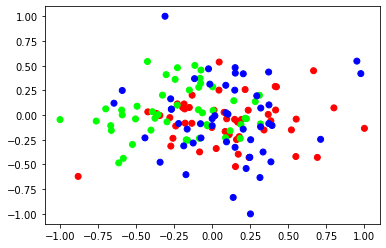

INFO: Projection des données d'entrainements 2D sur la feature 2 et la feature 3


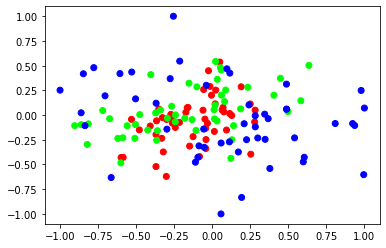

In [5]:
for i in range(training_features.shape[1]):
    
    for j in range(training_features.shape[1]):
        
        if j > i:
            
            print("INFO: Projection des données d'entrainements 2D sur la feature {} et la feature {}".format(i, j))
            plt.scatter(training_features.T[i, :], training_features.T[j, :], color=training_labels)
            plt.show()

## VARIATIONAL QUANTUM CLASSIFIER

#### MODEL

In [6]:
feature_map = RawFeatureVector(feature_dimension=feature_dim)

ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)

vqc = VQC(feature_map=feature_map,
            ansatz=ansatz,
            optimizer=COBYLA(maxiter=100),
            quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                                shots=1024,
                                                seed_simulator=seed,
                                                seed_transpiler=seed))

Cannot compute gradient operator! Continuing without gradients!


#### TRAIN

In [9]:
start = datetime.datetime.now()

vqc.fit(training_features, training_labels)

trainTime = datetime.datetime.now() - start

print("INFO: Durée de l'entrainement ", trainTime)

INFO: Durée de l'entrainement  0:06:13.401757


#### RESULT

INFO: 0.8210290827740492 de réussite sur les données d'entrainement
INFO: Projection des données d'entrainements 2D sur la feature 0 et la feature 1


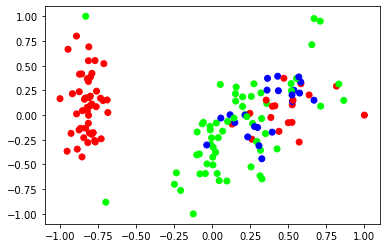

INFO: Projection des données d'entrainements 2D sur la feature 0 et la feature 2


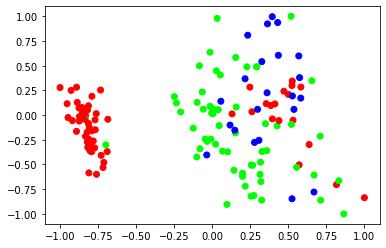

INFO: Projection des données d'entrainements 2D sur la feature 0 et la feature 3


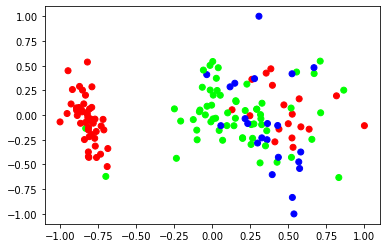

INFO: Projection des données d'entrainements 2D sur la feature 1 et la feature 2


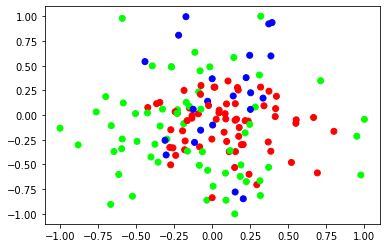

INFO: Projection des données d'entrainements 2D sur la feature 1 et la feature 3


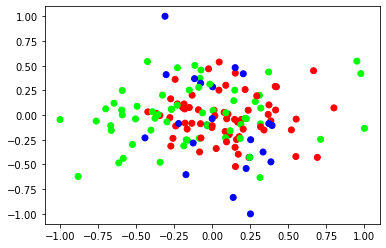

INFO: Projection des données d'entrainements 2D sur la feature 2 et la feature 3


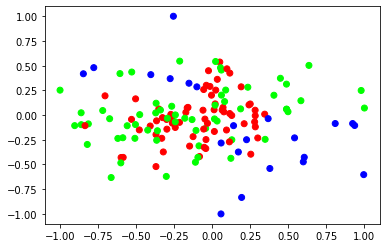

In [10]:
score = vqc.score(training_features, training_labels)

print("INFO: {} de réussite sur les données d'entrainement".format(score))

predictions = vqc.predict(training_features)

for i in range(training_features.shape[1]):
    
    for j in range(training_features.shape[1]):
        
        if j > i:
            
            print("INFO: Projection des données d'entrainements 2D sur la feature {} et la feature {}".format(i, j))
            plt.scatter(training_features.T[i, :], training_features.T[j, :], color=predictions)
            plt.show()